# Forecast the CocaCola prices  data set. Prepare a document for each model explaining 
 # how many dummy variables you have created and RMSE value for model. Finally which model you will use for 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
cococola=pd.read_excel("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")

In [4]:
cococola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
cococola.shape

(42, 2)

In [6]:
cococola.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
cococola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
cococola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
cococola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

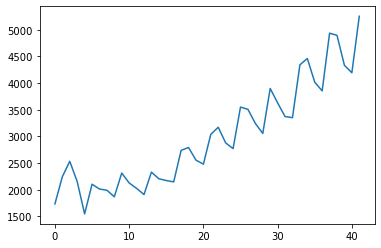

In [10]:
cococola['Sales'].plot()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

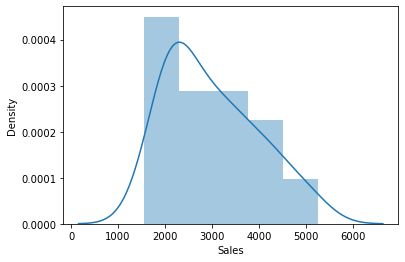

In [11]:
sns.distplot(cococola['Sales'])

<AxesSubplot:xlabel='Sales'>

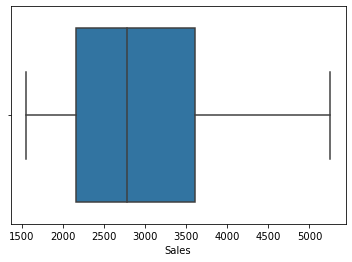

In [12]:
sns.boxplot(cococola['Sales'])

In [13]:
data=cococola.copy()

In [14]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [15]:
data["Quart"]=0
for i in range(42):
    p=data["Quarter"][i]
    data["Quart"][i]=p[0:2]

In [16]:
data.head()

,Quarter,Sales,Quart
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [17]:
#creating dummies
dummies=pd.get_dummies(data["Quart"])

In [18]:
dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [19]:
data=pd.concat([data,dummies],axis=1)

In [20]:
data.head()

,Quarter,Sales,Quart,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [21]:
data['t']=np.arange(0,42)
data['t_sqr'] = data['t']*data['t']
data['log_sales'] = np.log(data['Sales'])
data

,Quarter,Sales,Quart,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,5,25,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,6,36,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,7,49,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,8,64,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,9,81,7.746574


<AxesSubplot:xlabel='Quart', ylabel='Sales'>

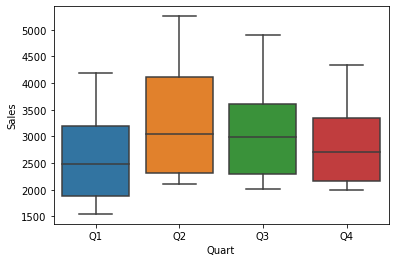

In [22]:
sns.boxplot(x="Quart",y="Sales",data=data)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

<AxesSubplot:>

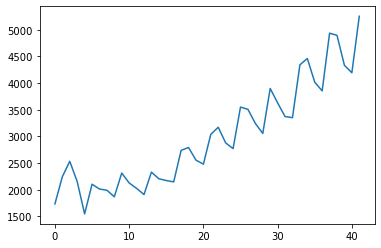

In [24]:
data.Sales.plot()

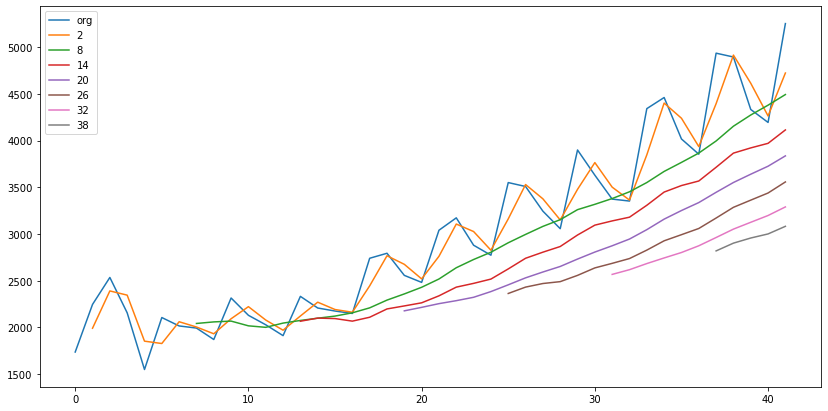

In [25]:
plt.figure(figsize=(14,7))
data.Sales.plot(label="org")
for i in range(2,40,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

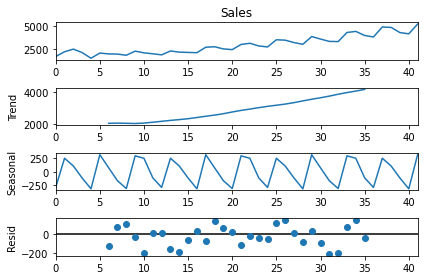

In [26]:
#time series decomposition plot

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

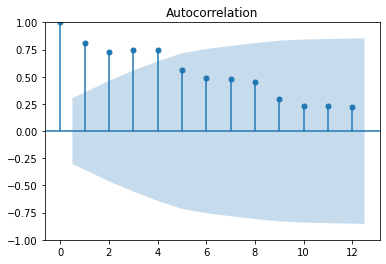

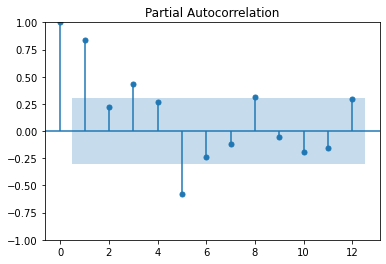

In [27]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [28]:
#evaluation Metric MAPE
#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [29]:
#Weighted Moving Average
import pandas as pd
import numpy as np 
df = pd.DataFrame({'X':range(100,30, -5)})
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['MA'] = df['X'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,X,MA
0,100,NaN
1,95,NaN
2,90,NaN
3,85,90.0
4,80,85.0
5,75,80.0
6,70,75.0
7,65,70.0
8,60,65.0
9,55,60.0


In [30]:
df=pd.DataFrame()
df['Sales']=data["Sales"]
df['WMA'] = df['Sales'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Sales,WMA
0,1734.827000,NaN
1,2244.960999,NaN
2,2533.804993,NaN
3,2154.962997,2244.601596
4,1547.818996,1996.873596
5,2104.411995,1990.483596
6,2014.362999,1962.128897
7,1991.746998,1976.671997
8,1869.049999,1958.457898
9,2313.631996,2085.953498


In [38]:
#simple exponential method
train=data.head(30)
test=data.tail(12)

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,Holt,ExponentialSmoothing

In [40]:
#Simple Exponential Smoothing Model

ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
ses_rmse=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_ses))**2))
ses_rmse

1153.703170572247

In [41]:
#HOLT Method
holt_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
holt_rmse=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_holt))**2))
holt_rmse

559.5201089305156

In [42]:
import statsmodels.formula.api as smf

In [43]:
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea=pd.Series(add_sea_model.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_additive_seasonality=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_additive_seasonality)

RMSE Additive seasonality:  1778.0065467941365
